# 11_A_Comparison_12MP-48MP
In diesem Jupyter Notebook werden Visualisierungen aus Bildaufnahmen der DJI Mini 3 Pro und der DJI Mavic 3T erstellt.

Die Bilder wurden am 07.03.2024 erstellt.

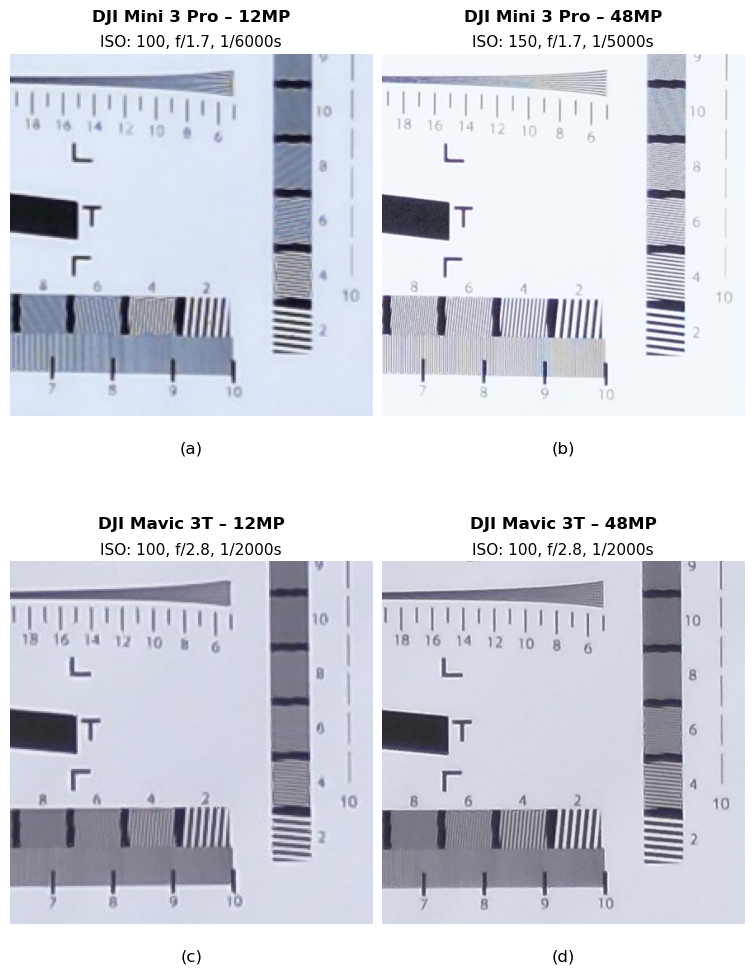

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# EINGABE Bildpfade
base_dir = "110_A_BaseData"
image_files = [
    "DJI_Mini3Pro_ISO-12233_12MP_cut.JPG",
    "DJI_Mini3Pro_ISO-12233_48MP_cut.JPG",
    "DJI_Mavic3T_ISO12233_12MP_cut.JPG",
    "DJI_Mavic3T_ISO12233_48MP_cut.JPG"
]
subfig_labels = ['(a)', '(b)', '(c)', '(d)']
manual_metadata = [
    "ISO: 100, f/1.7, 1/6000s",
    "ISO: 150, f/1.7, 1/5000s",
    "ISO: 100, f/2.8, 1/2000s",
    "ISO: 100, f/2.8, 1/2000s"
]
crop_sizes = {"12MP": 220, "48MP": 440}
image_paths = [os.path.join(base_dir, f) for f in image_files]

# === Create 2x2 figure with custom spacing ===
fig, axes = plt.subplots(2, 2, figsize=(8, 10), gridspec_kw={'hspace': 0.4, 'wspace': 0})

for i, (path, label) in enumerate(zip(image_paths, subfig_labels)):
    img = Image.open(path)
    width, height = img.size

    resolution = "48MP" if "48MP" in path else "12MP"
    crop_size = crop_sizes[resolution]
    center_x, center_y = width // 2, height // 2
    crop_box = (
        center_x - crop_size // 2,
        center_y - crop_size // 2,
        center_x + crop_size // 2,
        center_y + crop_size // 2
    )
    cropped = img.crop(crop_box)

    # Camera label
    if "Mini3Pro" in path:
        camera = "DJI Mini 3 Pro"
    elif "Mavic3T" in path:
        camera = "DJI Mavic 3T"
    else:
        camera = "Unknown"

    row = i // 2
    col = i % 2
    ax = axes[row, col]
    ax.imshow(cropped)
    ax.axis("off")

    # Titel
    ax.text(0.5, 1.08, f"{camera} – {resolution}", fontsize=12, fontweight='bold',
            ha='center', va='bottom', transform=ax.transAxes)
    ax.text(0.5, 1.01, manual_metadata[i], fontsize=11,
            ha='center', va='bottom', transform=ax.transAxes)

    # Subfigure label
    ax.text(0.5, -0.07, label, fontsize=12,
            ha='center', va='top', transform=ax.transAxes)

# Optional fine-tune layout
plt.subplots_adjust(top=0.92, bottom=0.05, left=0.05, right=0.98)
plt.show()


